In [ ]:
import os

# Create folder named 'images_to_stitch'
os.makedirs('images_to_stitch', exist_ok=True)
print("Folder 'images_to_stitch' created.")

Folder 'images_to_stitch' created.


In [ ]:
from google.colab import files

# Upload files (for stitching or noisy image)
uploaded = files.upload()  # You’ll be prompted to upload files


Saving left.jpg.png to left.jpg.png
Saving right.jpg.png to right.jpg.png


In [ ]:
import shutil

# Move uploaded files to the folder
shutil.move('left.png', 'images_to_stitch/left.jpg')
shutil.move('right.png', 'images_to_stitch/right.jpg')

uploaded = files.upload()  # Upload a file like 'noisy_image.jpg'

Saving noisy_image.jpg.png to noisy_image.jpg.png


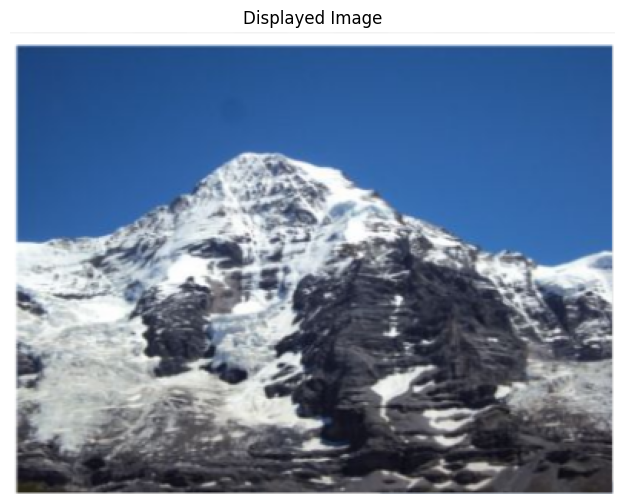

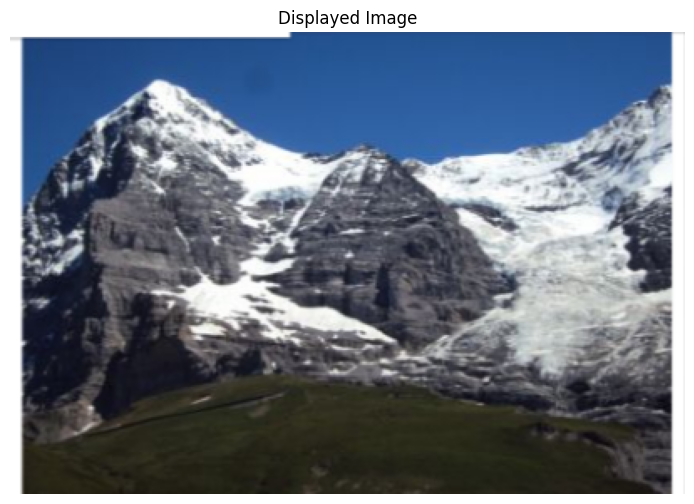

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load image using OpenCV (replace with your actual image file)
img1 = cv2.imread('/content/left.jpg.png', cv2.IMREAD_COLOR)  # Load in color
img2 = cv2.imread('/content/noisy_image.jpg.png', cv2.IMREAD_COLOR)  # Load in color

# Convert BGR (OpenCV) to RGB (matplotlib)
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb1)
plt.title("Displayed Image")
plt.axis('off')
plt.show()
# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb2)
plt.title("Displayed Image")
plt.axis('off')
plt.show()


[✔] Inpainted image saved to: inpainted_output.jpg


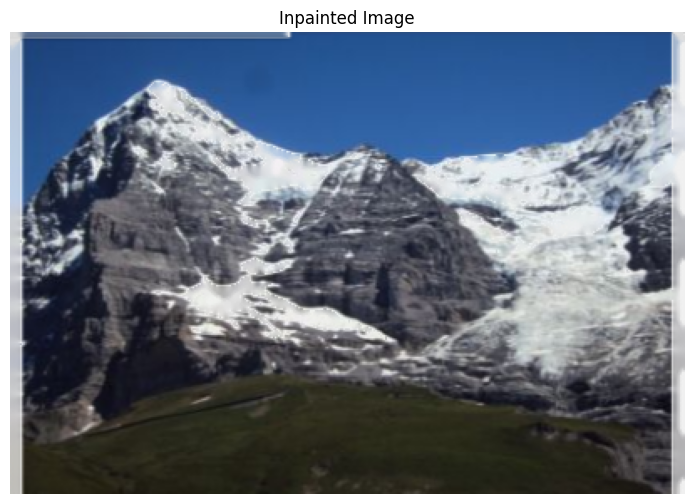


🔧 Performing Simple Image Stitching...
[✔] Simple stitched image saved to: simple_stitch.jpg


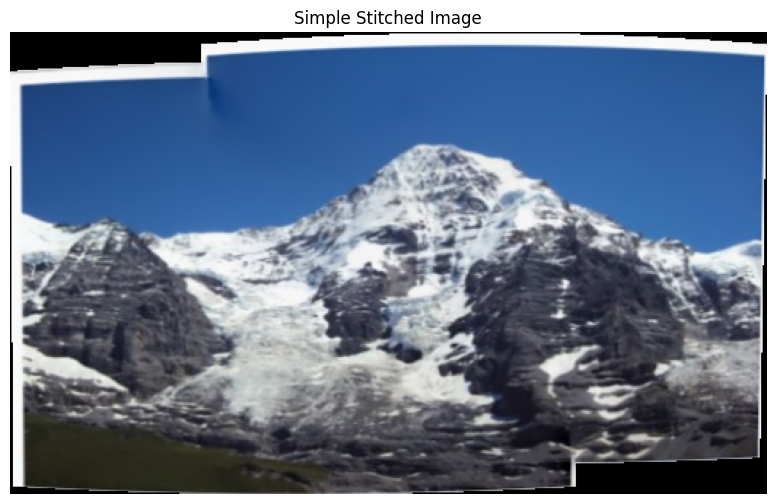


🌄 Performing Panorama Stitching (Wide-Angle)...
[✔] Panorama saved to: panorama_output.jpg


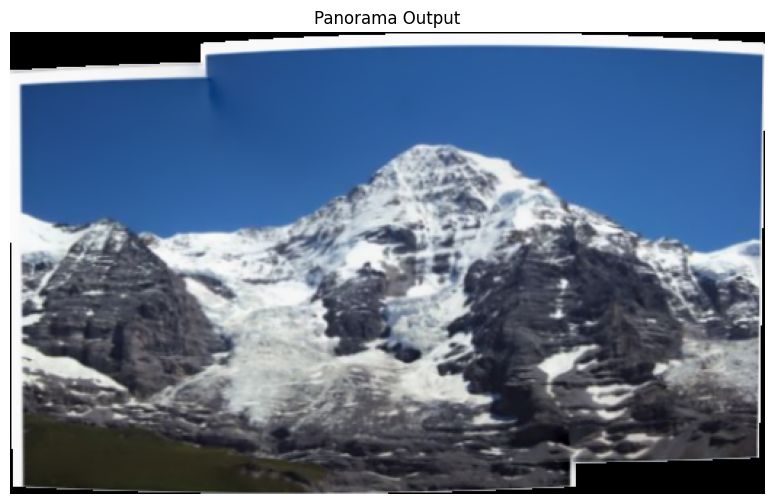

In [ ]:
# 📌 Step 1: Import Libraries & Setup
import cv2
import numpy as np
import os
import shutil
from google.colab import files
import matplotlib.pyplot as plt

# 📌 Step 3: Helper Function to Show Images
def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 📌 Step 4: Inpainting Function (Optional)
def image_inpainting(noisy_image_path, output_path='inpainted_output.jpg'):
    image = cv2.imread(noisy_image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    inpainted = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
    cv2.imwrite(output_path, inpainted)
    print(f"[✔] Inpainted image saved to: {output_path}")
    show_image("Inpainted Image", inpainted)
    return inpainted

# 📌 Step 5: Simple Image Stitching
def simple_image_stitching(image_paths, output_path='simple_stitch.jpg'):
    print("\n🔧 Performing Simple Image Stitching...")
    images = [cv2.imread(path) for path in image_paths]
    stitcher = cv2.Stitcher_create()
    status, stitched = stitcher.stitch(images)
    if status == cv2.Stitcher_OK:
        cv2.imwrite(output_path, stitched)
        print(f"[✔] Simple stitched image saved to: {output_path}")
        show_image("Simple Stitched Image", stitched)
        return stitched
    else:
        print(f"[✘] Simple stitching failed. Status code: {status}")
        return None

# 📌 Step 6: Panorama Stitching
def panorama_stitching(image_paths, output_path='panorama_output.jpg'):
    print("\n🌄 Performing Panorama Stitching (Wide-Angle)...")
    images = [cv2.imread(path) for path in image_paths]
    stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
    status, pano = stitcher.stitch(images)
    if status == cv2.Stitcher_OK:
        cv2.imwrite(output_path, pano)
        print(f"[✔] Panorama saved to: {output_path}")
        show_image("Panorama Output", pano)
        return pano
    else:
        print(f"[✘] Panorama stitching failed. Status code: {status}")
        return None

# 📌 Step 7: Process Uploaded Files

# Collect all images in the folder
image_files = sorted([
    os.path.join('images_to_stitch', f)
    for f in os.listdir('images_to_stitch')
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])

# 🔹 Inpainting (Optional)
if os.path.exists('noisy_image.png'):
    image_inpainting('noisy_image.png')
else:
    print("[ℹ] Skipping inpainting (no 'noisy_image.jpg' uploaded).")

# 🔹 Perform Simple Image Stitching
if len(image_files) >= 2:
    simple_image_stitching(image_files)
    panorama_stitching(image_files)
else:
    print("[!] Please upload at least 2 images for stitching.")


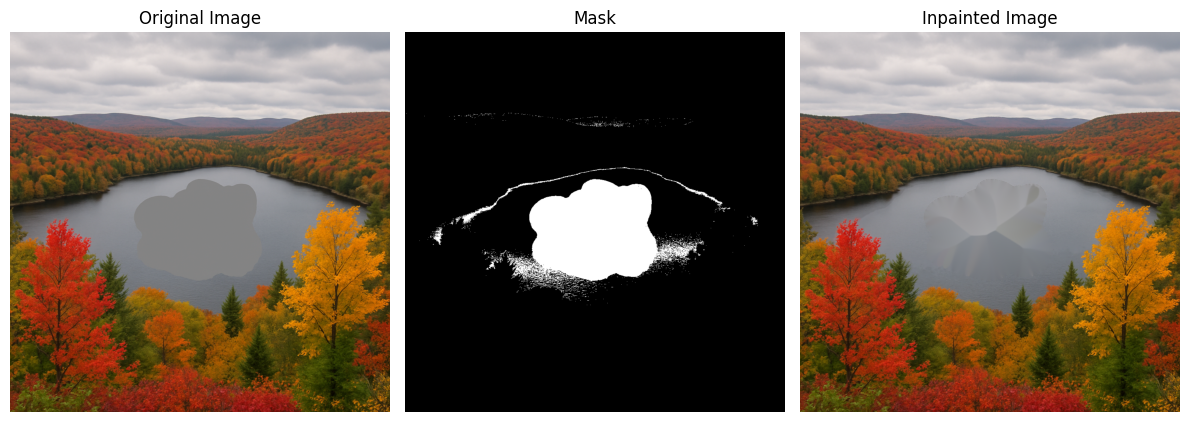

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image1.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a mask: detect the gray area
lower_bound = np.array([120, 120, 120])
upper_bound = np.array([135, 135, 135])
mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Inpaint the image
inpainted_image = cv2.inpaint(image_rgb, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Plot original and inpainted image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(inpainted_image)
plt.title("Inpainted Image")
plt.axis("off")

plt.tight_layout()
plt.show()


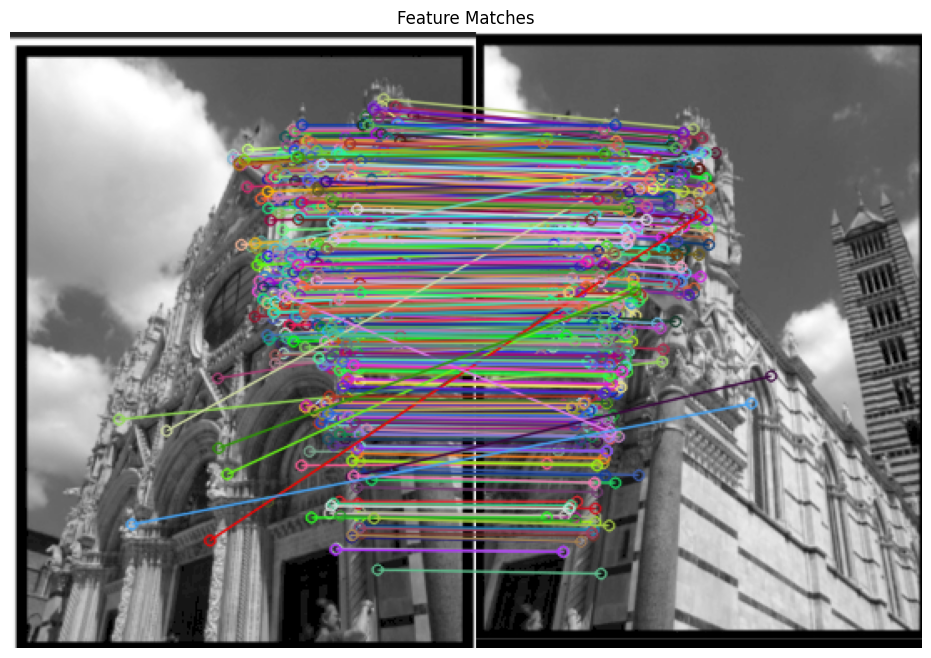

✅ Essential Matrix:
 [[ 0.00518274  0.01293285 -0.37284972]
 [-0.01537995  0.00355569  0.60059886]
 [-0.19583609  0.67931472 -0.00072553]]

✅ Recovered Rotation:
 [[-0.66954198 -0.74194714 -0.03504243]
 [-0.74166775  0.67037432 -0.02296118]
 [ 0.04052752  0.01061637 -0.99912202]]
✅ Recovered Translation:
 [[ 0.84945743]
 [ 0.5273174 ]
 [-0.01893214]]


In [ ]:
# 📌 Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 📌 Step 2: Load Two Overlapping Images (must be uploaded first)
img1 = cv2.imread('/content/l9_p1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/l9_p2.png', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise Exception("❌ Please ensure 'image1.jpg' and 'image2.jpg' exist in the 'images_to_stitch' folder.")

# 📌 Step 3: Feature Detection & Matching (using ORB for simplicity)
orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Feature matching using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)

# Ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 📌 Step 4: Draw Matches (Optional)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(16, 8))
plt.title("Feature Matches")
plt.imshow(img_matches, cmap='gray')
plt.axis('off')
plt.show()

# 📌 Step 5: Estimate Motion using Essential Matrix
if len(good_matches) >= 8:
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

    # Assume camera intrinsics are identity (for demo); ideally use real K
    K = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

    E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
    print("✅ Essential Matrix:\n", E)

    # Recover pose
    points, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)
    print("\n✅ Recovered Rotation:\n", R)
    print("✅ Recovered Translation:\n", t)
else:
    print("❌ Not enough matches found to estimate motion.")



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 216ms/step - loss: 0.1235 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 217ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 215ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 213ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 214ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 214ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 215ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - loss: 0.1119 - val_loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


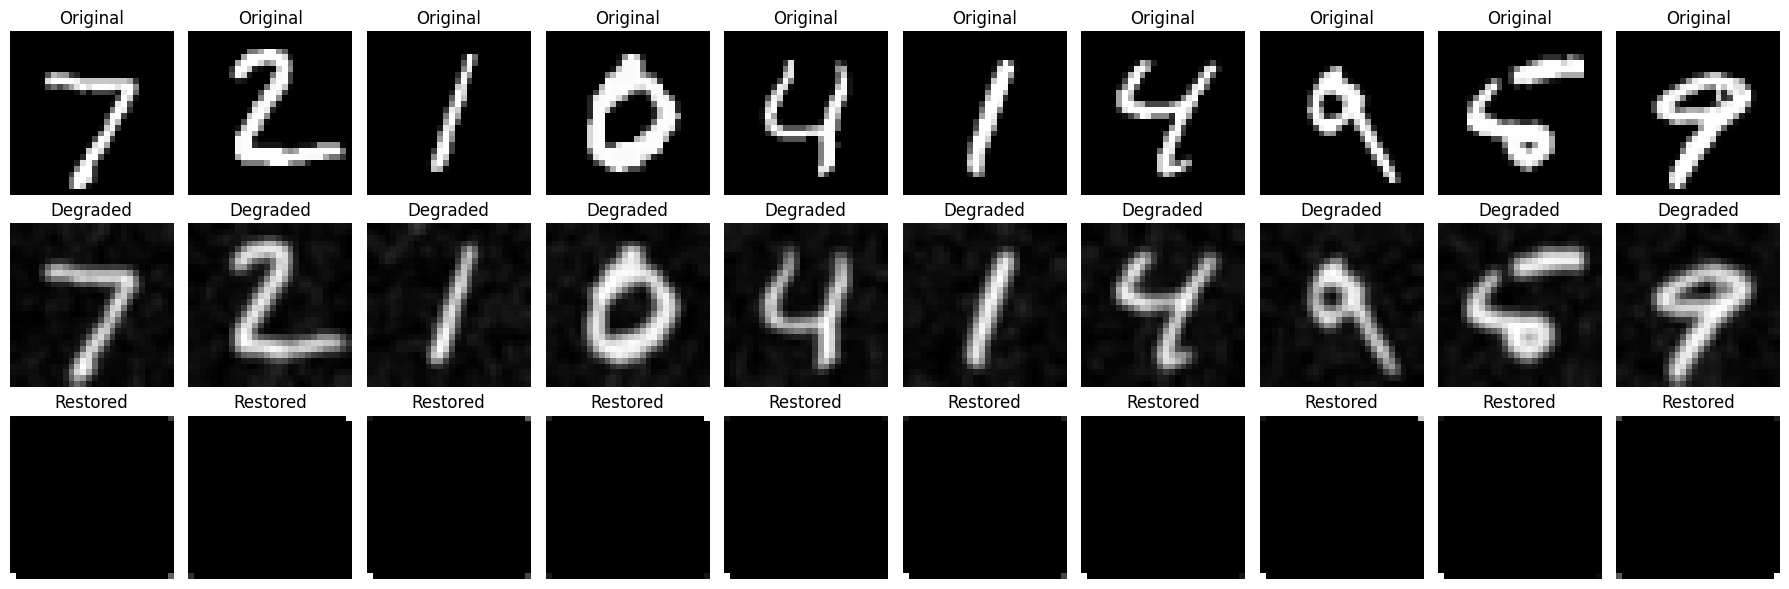

📈 Average PSNR on first 100 samples: 10.23 dB


In [ ]:
# Step 1: Import Libraries and Load Data
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# Step 2: Simulate Degradation (Gaussian Noise + Blur)
def add_noise_and_blur(images):
    noisy_blurred = []
    for img in images:
        noise = np.random.normal(loc=0.0, scale=0.1, size=img.shape)  # reduced noise
        noisy = img + noise
        noisy = np.clip(noisy, 0., 1.)  # clip to [0, 1]
        blurred = cv2.GaussianBlur(noisy, (3, 3), 0)  # Gaussian blur
        noisy_blurred.append(blurred)
    return np.array(noisy_blurred).reshape(-1, 28, 28, 1)

x_train_noisy = add_noise_and_blur(x_train)
x_test_noisy = add_noise_and_blur(x_test)

# Step 3: Build Autoencoder Model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.summary()

# Step 4: Train the Model
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Step 5: Restore Images and Evaluate
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and restored images
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Degraded")
    plt.axis('off')

    # Restored
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Restored")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 6: Evaluate Using PSNR
psnr_scores = [psnr(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28)) for i in range(100)]
print(f"📈 Average PSNR on first 100 samples: {np.mean(psnr_scores):.2f} dB")


In [ ]:
# Pixel-wise Accuracy
threshold = 0.1
accuracies = []
for i in range(len(x_test)):
    original = x_test[i].reshape(-1)
    restored = decoded_imgs[i].reshape(-1)
    match = np.abs(original - restored) < threshold
    accuracy = np.mean(match)
    accuracies.append(accuracy)

print(f"✅ Pixel-wise restoration accuracy: {np.mean(accuracies)*100:.2f}%")

# SSIM
from skimage.metrics import structural_similarity as ssim
ssim_scores = []
for i in range(100):
    orig = x_test[i].reshape(28, 28)
    rest = decoded_imgs[i].reshape(28, 28)
    score = ssim(orig, rest, data_range=1.0)
    ssim_scores.append(score)

print(f"✅ Average SSIM on first 100 samples: {np.mean(ssim_scores):.4f}")


✅ Pixel-wise restoration accuracy: 82.44%
✅ Average SSIM on first 100 samples: 0.2589


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,193 (188.25 KB)

 Trainable params: 47,809 (186.75 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 303s 630ms/step - loss: 0.2600 - val_loss: 0.4575
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 317s 621ms/step - loss: 0.1016 - val_loss: 0.0932
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 321s 618ms/step - loss: 0.0976 - val_loss: 0.0912
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 321s 616ms/step - loss: 0.0958 - val_loss: 0.0885
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 617ms/step - loss: 0.0943 - val_loss: 0.0882
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 296s 630ms/step - loss: 0.0937 - val_loss: 0.0916
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 316s 618ms/step - loss: 0.0930 - val_loss: 0.0884
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 325s 624ms/step - loss: 0.0925 - val_loss: 0.0887
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 321s 622ms/step - loss: 0.0919 - val_loss: 0.0942
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 624ms/step - loss: 0.0917 - val_loss: 0.0865
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 294s 626ms/step - loss: 0.0909 - val_loss: 0.0863
Epoch 12

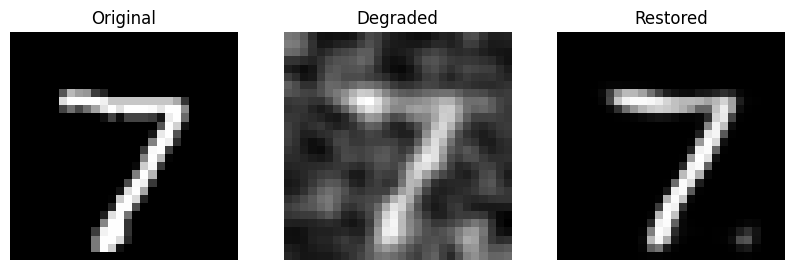

Average PSNR on test images: 21.638896140242906


In [ ]:
# Image Restoration using Improved Autoencoder on MNIST

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load & Preprocess Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Step 2: Simulate Degradation
def add_noise(images):
    noise_factor = 0.4
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy, 0., 1.)

def apply_gaussian_blur(images):
    blurred = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in images])
    return blurred.reshape(-1, 28, 28, 1)

x_train_degraded = apply_gaussian_blur(add_noise(x_train))
x_test_degraded = apply_gaussian_blur(add_noise(x_test))

# Step 3: Build the Improved Autoencoder Model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.summary()

# Step 4: Train the Model
autoencoder.fit(
    x_train_degraded, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_degraded, x_test)
)

# Step 5: Image Restoration & Evaluation
restored_images = autoencoder.predict(x_test_degraded)

def display_images(index):
    plt.figure(figsize=(10, 3))
    titles = ['Original', 'Degraded', 'Restored']
    images = [x_test[index], x_test_degraded[index], restored_images[index]]

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Show result for one sample image
display_images(0)

# Calculate average PSNR for the first 100 test images
avg_psnr = np.mean([
    psnr(x_test[i].reshape(28, 28), restored_images[i].reshape(28, 28))
    for i in range(100)
])
print("Average PSNR on test images:", avg_psnr)


Epoch [1/50]  D_loss: 1.2159  G_loss: 0.8552
Epoch [2/50]  D_loss: 1.2761  G_loss: 0.9650
Epoch [3/50]  D_loss: 1.3172  G_loss: 1.0859
Epoch [4/50]  D_loss: 1.3326  G_loss: 0.7940
Epoch [5/50]  D_loss: 1.2388  G_loss: 0.8410
Epoch [6/50]  D_loss: 1.2545  G_loss: 1.0987
Epoch [7/50]  D_loss: 1.3340  G_loss: 0.9027
Epoch [8/50]  D_loss: 1.2892  G_loss: 0.7891
Epoch [9/50]  D_loss: 1.2891  G_loss: 0.9686
Epoch [10/50]  D_loss: 1.3639  G_loss: 0.8784
Epoch [11/50]  D_loss: 1.3273  G_loss: 0.9296
Epoch [12/50]  D_loss: 1.3208  G_loss: 0.8778
Epoch [13/50]  D_loss: 1.2642  G_loss: 0.9306
Epoch [14/50]  D_loss: 1.3070  G_loss: 0.8786
Epoch [15/50]  D_loss: 1.3037  G_loss: 0.9021
Epoch [16/50]  D_loss: 1.2963  G_loss: 0.9930
Epoch [17/50]  D_loss: 1.3195  G_loss: 0.8849
Epoch [18/50]  D_loss: 1.3032  G_loss: 0.8645
Epoch [19/50]  D_loss: 1.3526  G_loss: 0.8899
Epoch [20/50]  D_loss: 1.3306  G_loss: 0.8256
Epoch [21/50]  D_loss: 1.3365  G_loss: 0.8773
Epoch [22/50]  D_loss: 1.3241  G_loss: 0.89

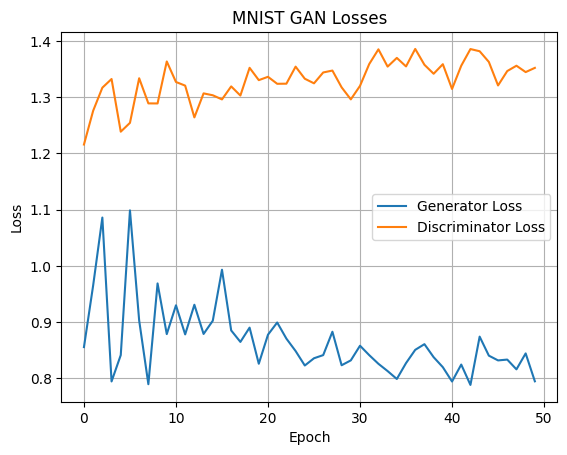

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_dim = 100
image_size = 28*28
batch_size = 128
lr = 0.0002
epochs = 50
beta1 = 0.5
beta2 = 0.999
label_smooth = 0.9

# MNIST Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataloader = DataLoader(
    torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.net(img)

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# Loss
criterion = nn.BCELoss()

# Training Loop
G_losses = []
D_losses = []

for epoch in range(epochs):
    for batch in dataloader:
        real_imgs, _ = batch
        real_imgs = real_imgs.view(-1, image_size).to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.full((batch_size, 1), label_smooth, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # ---------------------
        # Train Discriminator
        # ---------------------
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z).detach()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        # Train Generator
        # -----------------
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), real_labels)  # want to fool D

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    G_losses.append(g_loss.item())
    D_losses.append(d_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")

# Plot Losses
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.title("MNIST GAN Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


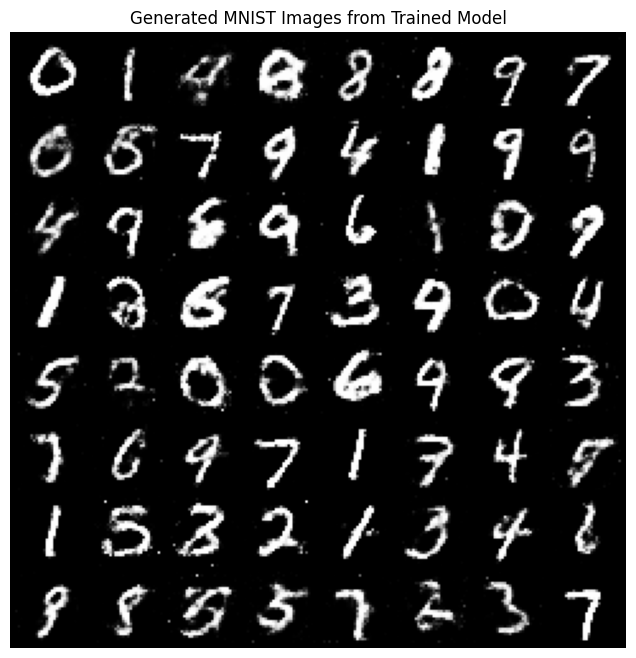

In [ ]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# Assuming 'trained_generator' is your trained generator model
# and 'device' is set to your desired device (cuda or cpu)

def display_trained_mnist_images(trained_generator, num_images=64, latent_dim=100):
    trained_generator.eval()  # Set the generator to evaluation mode

    # Generate random noise as input for the generator
    noise = torch.randn(num_images, latent_dim).to(device)  # Removed extra dimensions

    # Generate images without tracking gradients
    with torch.no_grad():
        generated_images = generator(noise).detach().cpu()

    # Reshape generated images to (num_images, 1, 28, 28)
    generated_images = generated_images.view(num_images, 1, 28, 28)

    # Create a grid of images and display it
    grid = vutils.make_grid(generated_images, nrow=8, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Generated MNIST Images from Trained Model")
    plt.imshow(grid.permute(1, 2, 0).numpy())  # Permute and convert to numpy for display
    plt.show()

# Call the function to display images
display_trained_mnist_images(generator)

Epoch [1/50]  D_loss: 1.0764  G_loss: 3.1849
Epoch [2/50]  D_loss: 0.8534  G_loss: 1.8704
Epoch [3/50]  D_loss: 0.8051  G_loss: 2.2316
Epoch [4/50]  D_loss: 0.9835  G_loss: 3.9279
Epoch [5/50]  D_loss: 0.9396  G_loss: 1.6169
Epoch [6/50]  D_loss: 0.7784  G_loss: 1.8491
Epoch [7/50]  D_loss: 0.6840  G_loss: 1.9065
Epoch [8/50]  D_loss: 0.9484  G_loss: 2.2597
Epoch [9/50]  D_loss: 1.0125  G_loss: 2.8163
Epoch [10/50]  D_loss: 0.8502  G_loss: 1.8648
Epoch [11/50]  D_loss: 0.7317  G_loss: 2.7353
Epoch [12/50]  D_loss: 0.6263  G_loss: 3.1292
Epoch [13/50]  D_loss: 0.7118  G_loss: 2.1530
Epoch [14/50]  D_loss: 0.7651  G_loss: 2.4467
Epoch [15/50]  D_loss: 0.5836  G_loss: 2.2071
Epoch [16/50]  D_loss: 0.8554  G_loss: 2.2539
Epoch [17/50]  D_loss: 0.9100  G_loss: 1.7093
Epoch [18/50]  D_loss: 1.1282  G_loss: 2.9471
Epoch [19/50]  D_loss: 0.7683  G_loss: 1.9327
Epoch [20/50]  D_loss: 0.7720  G_loss: 2.1543
Epoch [21/50]  D_loss: 0.7496  G_loss: 2.1008
Epoch [22/50]  D_loss: 0.6971  G_loss: 1.82

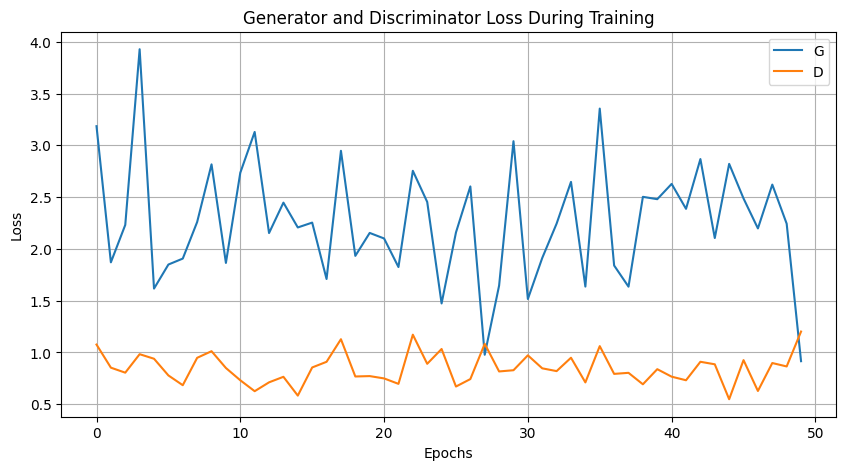

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_dim = 100
image_size = 32
channels = 3
batch_size = 128
lr = 0.0002
epochs = 50
beta1 = 0.5
beta2 = 0.999

# CIFAR-10 Loader
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataloader = DataLoader(
    torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True),
    batch_size=batch_size,
    shuffle=True
)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.net(img).view(-1, 1).squeeze(1)

# Models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# Labels
real_label = 0.9  # Label smoothing
fake_label = 0.0

# Training
G_losses = []
D_losses = []

for epoch in range(epochs):
    for imgs, _ in dataloader:
        imgs = imgs.to(device)
        batch_size = imgs.size(0)

        # Train Discriminator
        discriminator.zero_grad()
        real = torch.full((batch_size,), real_label, device=device)
        fake = torch.full((batch_size,), fake_label, device=device)

        output_real = discriminator(imgs)
        loss_real = criterion(output_real, real)

        noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_imgs = generator(noise)
        output_fake = discriminator(fake_imgs.detach())
        loss_fake = criterion(output_fake, fake)

        d_loss = loss_real + loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        output = discriminator(fake_imgs)
        g_loss = criterion(output, real)
        g_loss.backward()
        optimizer_G.step()

    G_losses.append(g_loss.item())
    D_losses.append(d_loss.item())
    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")

# Loss Plot
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


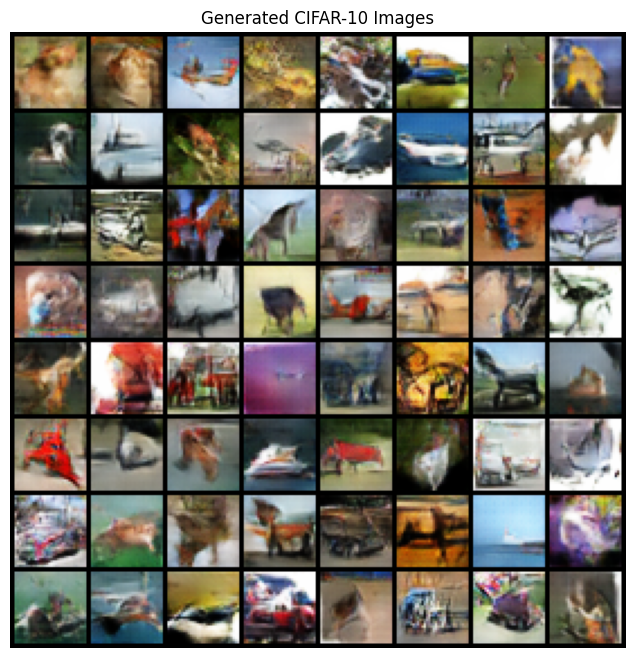

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torch

def display_cifar10_images(generator, latent_dim=100, num_images=64):
    generator.eval()  # Set the generator to evaluation mode
    noise = torch.randn(num_images, latent_dim, 1, 1).to(device)  # Create random noise

    with torch.no_grad():  # Disable gradient calculation
        fake_images = generator(noise).cpu()  # Generate images and move to CPU

    grid = vutils.make_grid(fake_images, nrow=8, normalize=True)  # Create image grid
    np_grid = grid.permute(1, 2, 0).numpy()  # Convert to NumPy for display

    plt.figure(figsize=(8, 8))  # Create a figure
    plt.axis("off")  # Turn off axis ticks
    plt.title("Generated CIFAR-10 Images")  # Set title
    plt.imshow(np_grid)  # Display the images
    plt.show()  # Show the plot
# Assuming your trained generator is named 'trained_generator'
display_cifar10_images(generator)


Training MobileNet-V1


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/17.0M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/5] Loss: 0.5249 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/5] Loss: 0.4893 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [3/5] Loss: 0.4690 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/5] Loss: 0.4542 Val Accuracy: 0.7767


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://d

Epoch [5/5] Loss: 0.4453 Val Accuracy: 0.7670
Training time for MobileNet-V1: 291.92s

Training MobileNet-V2


100%|██████████| 13.6M/13.6M [00:00<00:00, 168MB/s]
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/5] Loss: 0.5416 Val Accuracy: 0.7573


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/5] Loss: 0.4996 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [3/5] Loss: 0.4725 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [4/5] Loss: 0.4714 Val Accuracy: 0.7621


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [5/5] Loss: 0.4540 Val Accuracy: 0.7476
Training time for MobileNet-V2: 280.16s

Training MobileNet-V3


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 149MB/s]
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA 

Epoch [1/5] Loss: 0.5721 Val Accuracy: 0.7573


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/5] Loss: 0.4055 Val Accuracy: 0.7621


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/5] Loss: 0.3291 Val Accuracy: 0.7379


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/5] Loss: 0.2945 Val Accuracy: 0.7282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [5/5] Loss: 0.2011 Val Accuracy: 0.7670
Training time for MobileNet-V3: 279.36s


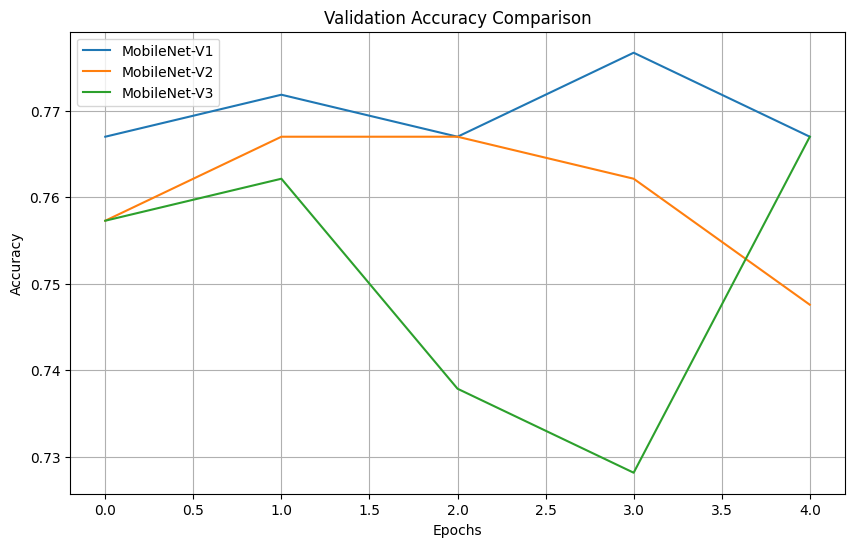

In [ ]:
# MobileNet V1, V2, V3 Comparison for Dog Breed Classification

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = '/root/.cache/kagglehub/datasets/gauravduttakiit/dogs-breed-dataset/versions/1'

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Common Training Loop
def train_model(model, criterion, optimizer, num_epochs=5):
    model.to(device)
    history = {"train_loss": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history["train_loss"].append(epoch_loss)

        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        history["val_acc"].append(acc)
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f} Val Accuracy: {acc:.4f}")

    return history

# Load and Modify Models
num_classes = len(dataset.classes)

def load_mobilenet(version="v2"):
    if version == "v1":
        import timm
        # Changed model name to 'mobilenetv1_100'
        model = timm.create_model('mobilenetv1_100', pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    # ... (rest of the function remains the same)
    elif version == "v2":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif version == "v3":
        model = models.mobilenet_v3_large(pretrained=True)
        model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
    else:
        raise ValueError("Unsupported version")

    for param in model.parameters():
        param.requires_grad = False
    for param in model.classifier.parameters():
        param.requires_grad = True

    return model

# Train and evaluate all versions
histories = {}
for version in ["v1", "v2", "v3"]:
    print(f"\nTraining MobileNet-{version.upper()}")
    model = load_mobilenet(version)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    start_time = time.time()
    history = train_model(model, criterion, optimizer, num_epochs=5)
    end_time = time.time()
    print(f"Training time for MobileNet-{version.upper()}: {end_time - start_time:.2f}s")
    histories[version] = history

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
for version in histories:
    plt.plot(histories[version]['val_acc'], label=f'MobileNet-{version.upper()}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import nbformat
import shutil

# 1️⃣ Backup the notebook first
notebook_path = "Stitching_Denoising_GAN_SegmentationPlayground.ipynb"
backup_path = "Stitching_Denoising_GAN_SegmentationPlayground_backup.ipynb"
shutil.copy(notebook_path, backup_path)
print(f"Backup created: {backup_path}")

# 2️⃣ Load the notebook
nb = nbformat.read(notebook_path, as_version=4)

# 3️⃣ Fix widget metadata for GitHub rendering
for cell in nb.cells:
    if "metadata" in cell and "widgets" in cell["metadata"]:
        for widget_id, widget in cell["metadata"]["widgets"].items():
            # Add empty state if missing
            widget.setdefault("state", {})

# 4️⃣ Save the notebook
nbformat.write(nb, notebook_path)
print("Notebook fixed for GitHub rendering! ✅ Save and push to GitHub.")